In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [81]:
image_size = [45, 45]
batch_size = 50
ds_train = image_dataset_from_directory(
    '/kaggle/input/graphex',
    labels='inferred',
    validation_split=0.2,
    subset="training",
    seed=1337,
    label_mode="categorical",
    image_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale"
    
)
ds_val = image_dataset_from_directory(
    '/kaggle/input/graphex',
    labels="inferred",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    label_mode="categorical",
    image_size=image_size,
    batch_size=batch_size,
    color_mode="grayscale"
)

Found 71569 files belonging to 18 classes.
Using 57256 files for training.
Found 71569 files belonging to 18 classes.
Using 14313 files for validation.


In [67]:
ds_train.class_names

['(',
 ')',
 '+',
 '-',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'X',
 'asterik',
 'caret',
 'forward_slash']

In [68]:
pretrained_base = tf.keras.models.load_model(
    '../input/cv-course-models/cv-course-models/vgg16-pretrained-base',
)

In [82]:
model = Sequential([
#     pretrained_base,
    layers.Conv2D(filters=64, kernel_size=3, input_shape =(45, 45, 1), activation ='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Dropout(0.2),
    layers.Conv2D(filters=30, kernel_size=3, activation ='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Conv2D(30, (3, 3), activation ='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(60, activation='relu'),
    layers.Dense(18, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

In [83]:
early_stopping = keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=3,
    restore_best_weights=True
)

In [84]:
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_val,
    callbacks=[early_stopping],
    shuffle=True
)

Epoch 1/10
1146/1146 [==============================] - 98s 85ms/step - loss: 3.5198 - accuracy: 0.3358 - val_loss: 0.6269 - val_accuracy: 0.8523
Epoch 2/10
1146/1146 [==============================] - 50s 43ms/step - loss: 0.6932 - accuracy: 0.7895 - val_loss: 0.4083 - val_accuracy: 0.9076
Epoch 3/10
1146/1146 [==============================] - 49s 42ms/step - loss: 0.4402 - accuracy: 0.8685 - val_loss: 0.2066 - val_accuracy: 0.9444
Epoch 4/10
1146/1146 [==============================] - 49s 43ms/step - loss: 0.2884 - accuracy: 0.9115 - val_loss: 0.1619 - val_accuracy: 0.9538
Epoch 5/10
1146/1146 [==============================] - 50s 43ms/step - loss: 0.2259 - accuracy: 0.9305 - val_loss: 0.1322 - val_accuracy: 0.9619
Epoch 6/10
1146/1146 [==============================] - 50s 43ms/step - loss: 0.2018 - accuracy: 0.9383 - val_loss: 0.1233 - val_accuracy: 0.9633
Epoch 7/10
1146/1146 [==============================] - 49s 43ms/step - loss: 0.1895 - accuracy: 0.9416 - val_loss: 0.1133 -

In [85]:
model.layers[0].input

<KerasTensor: shape=(None, 45, 45, 1) dtype=float32 (created by layer 'conv2d_2_input')>

<AxesSubplot:>

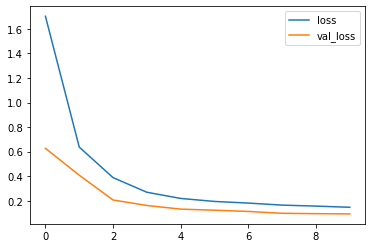

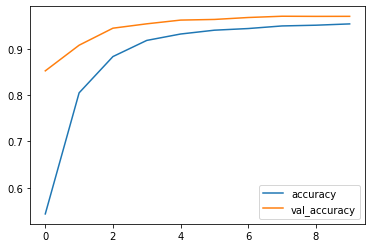

In [86]:
import matplotlib.pyplot as plt

history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot()

In [87]:
model.save("multiclass_verification_model")

In [88]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 43, 43, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 19, 19, 30)        17310     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 30)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 9, 30)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 30)         

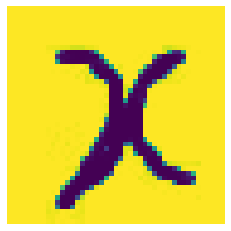

In [134]:
import tensorflow as tf

# path = '/kaggle/input/test-images/test_images/0.jpg'
# path = '/kaggle/input/test-images/test_images/1.jpg'
# path = '/kaggle/input/test-images/test_images/2.jpg'
# path = '/kaggle/input/test-images/test_images/3.jpg'
# path = '/kaggle/input/test-images/test_images/4.jpg'
# path = '/kaggle/input/test-images/test_images/5.jpg'
# path = '/kaggle/input/test-images/test_images/6.jpg'
# path = '/kaggle/input/test-images/test_images/7.jpg'
# path = '/kaggle/input/test-images/test_images/8.jpg'
# path = '/kaggle/input/test-images/test_images/9.jpg'
# path = '/kaggle/input/test-images/test_images/plus.jpg'
# path = '/kaggle/input/test-images/test_images/minus.jpg'
# path = '/kaggle/input/test-images/test_images/mul.jpg'
# path = '/kaggle/input/test-images/test_images/div.jpg'
# path = '/kaggle/input/test-images/test_images/caret.jpg'
path = '/kaggle/input/test-images/test_images/x.jpg'
image = tf.io.read_file(path)
image = tf.io.decode_jpeg(image, channels=1)
plt.axis(False)
plt.imshow(image)
plt.show()
image = tf.image.resize(image, size=[45, 45])
# image = tf.reshape(image, [1, *image.shape, 1])
image = tf.reshape(image, [1, 45, 45, 1])

In [135]:
prediction = model.predict(image)
prediction

array([[7.53848481e-15, 1.15238765e-11, 1.31158083e-06, 5.60951937e-17,
        1.19434003e-06, 2.95058555e-07, 3.10137942e-08, 1.26815197e-10,
        6.45928182e-08, 1.45952594e-09, 1.52499382e-07, 7.39738994e-07,
        5.89056663e-06, 8.65963634e-10, 9.99990225e-01, 1.55993334e-07,
        5.71546317e-11, 7.96517435e-11]], dtype=float32)

In [136]:
ds_train.class_names[prediction.argmax()]

'X'